# k-means clustering

k-means clustering partitions n observations into k clusters in which each observation belongs to the cluster with the nearest mean.

Here we're implementing a heuristic algorithm for k-means clustering.

We have N points that we want to partition into K clusters.

It works this way:

### Step 1: Initialize clusters

1. Pick K random points from the N points.
2. Assign each of the other N-K points to a cluster $ C_i $ where "i" is the index of the closest point from the K points selected above.

### Step 2: Iterate on changing the clusters until convergence

Repeat until no changes:

1. For each cluster, compute its mean.
2. Iterate over all N points and assign each one to a cluster indexed by the closest mean.

This is displayed and inplemented below:

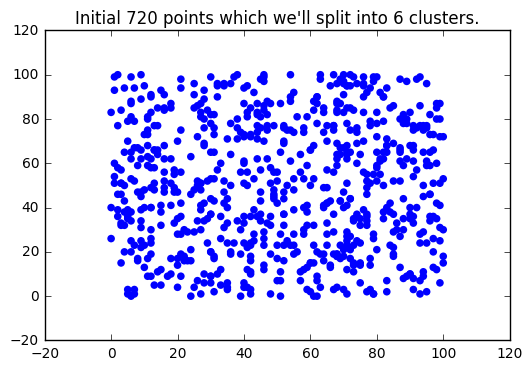

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


def plot_points(title, use_colors=True):
  xs = [p[0] for p in points]
  ys = [p[1] for p in points]
  assert(len(xs) == N)
  if use_colors:
    colors = [(cc / float(K)) for cc in cluster]
    plt.scatter(xs, ys, edgecolors='none', s=30, c=colors)
  else:
    plt.scatter(xs, ys, edgecolors='none', s=30)
  plt.title(title)
  plt.show()


# Number of points.
N = 720

# Number of clusters.
K = 6

points = []
for i in range(0, N):
  x = random.randint(0, 100)
  y = random.randint(0, 100)
  points.append((x, y))

plot_points('Initial %d points which we\'ll split into %d clusters.' % (N, K), use_colors=False)


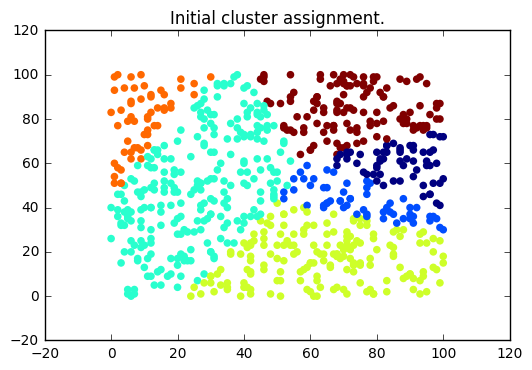

In [2]:
cluster = [-1] * N

indices = range(0, N)
random.shuffle(indices)

mean_point_idxs = indices[0: K]

for i in range(0, K):
  cluster[ mean_point_idxs[i] ] = i

for idx in range(0, N):
  if idx not in mean_point_idxs:
    # Find closest.
    ci = -1
    mindistance = 1 << 30
    for i in range(0, K):
      cm = mean_point_idxs[i]
      distance = (points[idx][0] - points[cm][0]) ** 2 + (points[idx][1] - points[cm][1]) ** 2
      if distance < mindistance:
        mindistance = distance
        ci = i

    cluster[idx] = ci

plot_points('Initial cluster assignment.')
  

MOVED = 111


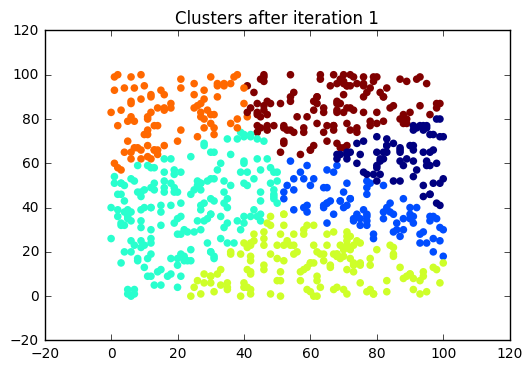

MOVED = 66


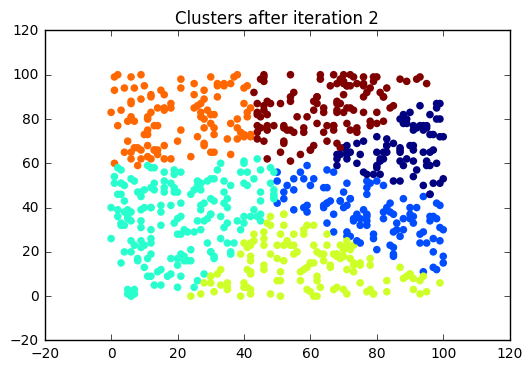

MOVED = 36


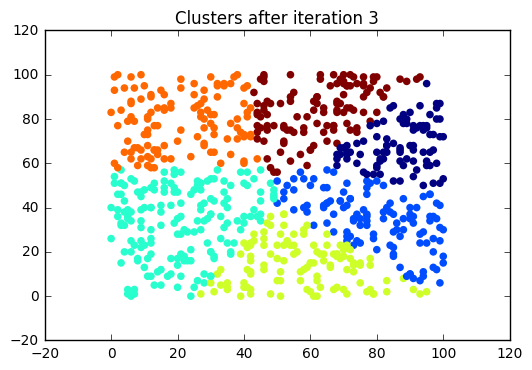

MOVED = 28


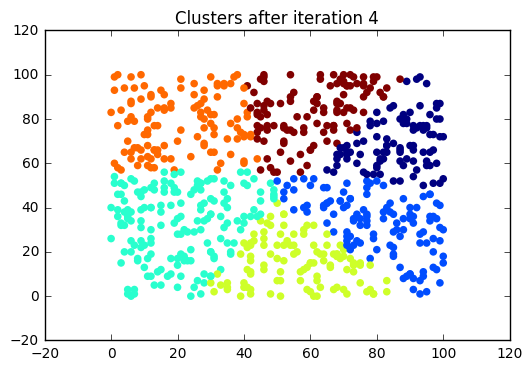

MOVED = 29


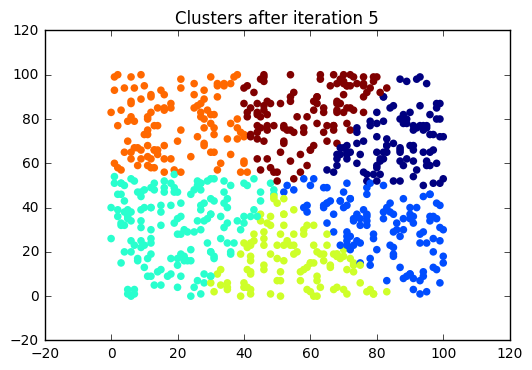

MOVED = 25


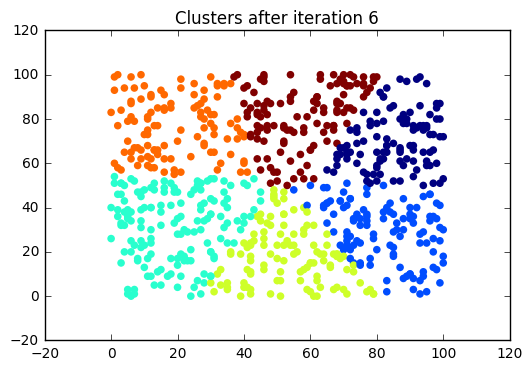

MOVED = 21


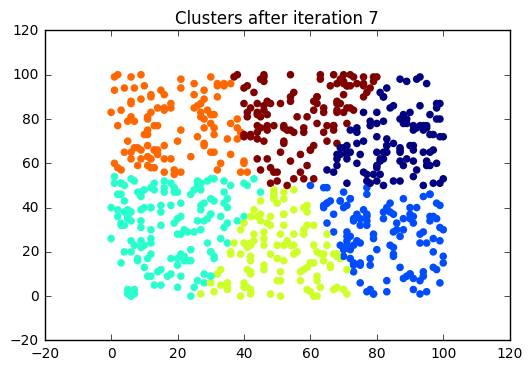

MOVED = 21


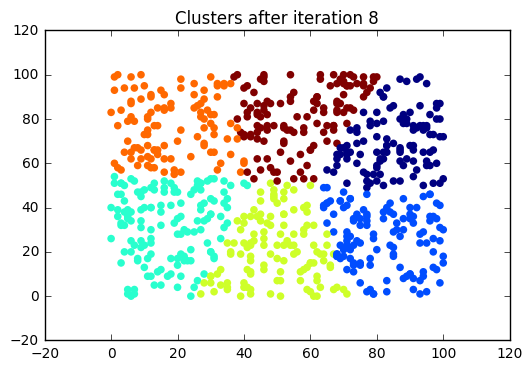

MOVED = 11


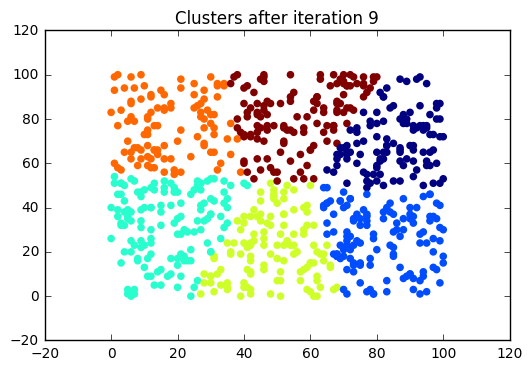

MOVED = 9


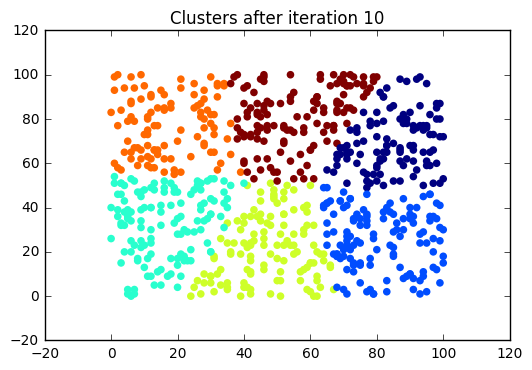

MOVED = 7


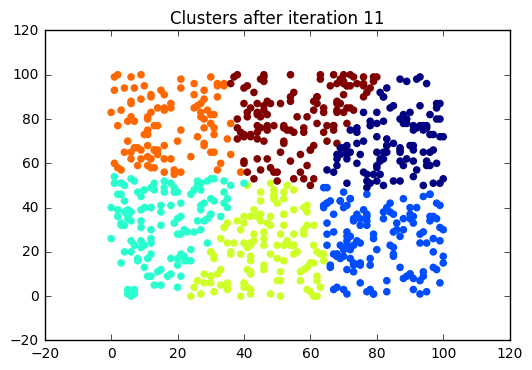

MOVED = 4


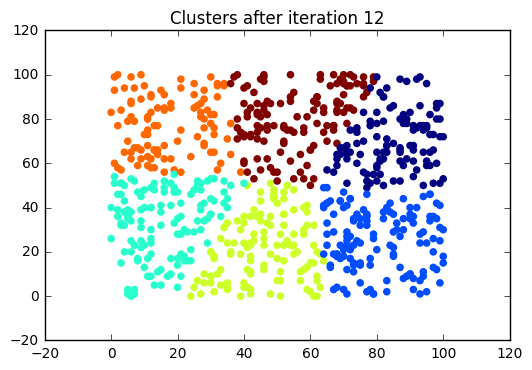

MOVED = 4


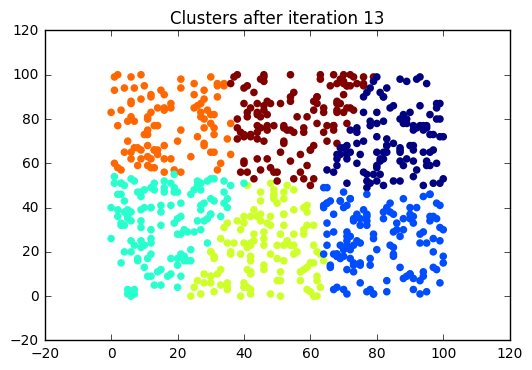

MOVED = 4


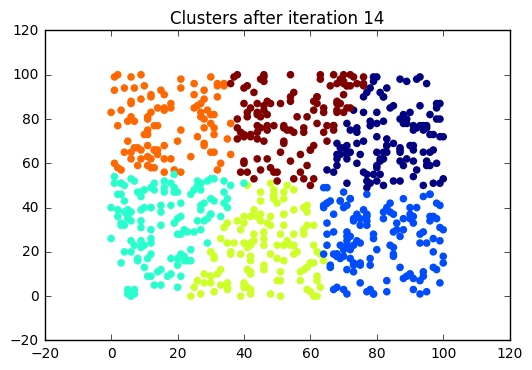

MOVED = 3


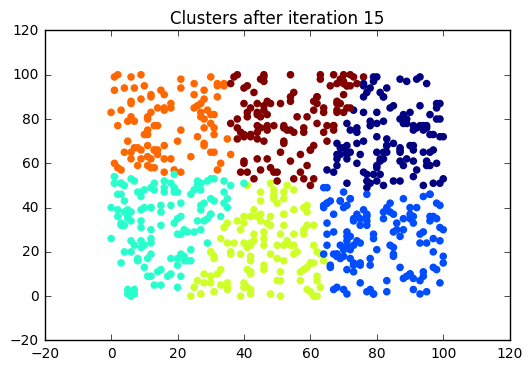

MOVED = 3


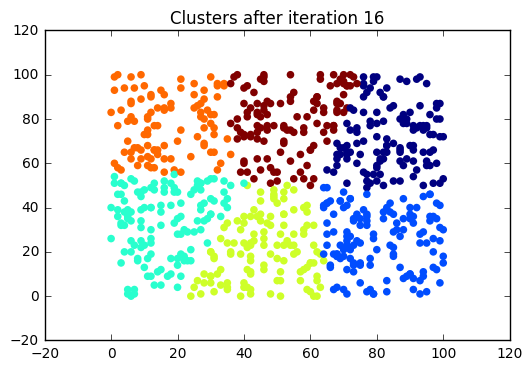

MOVED = 2


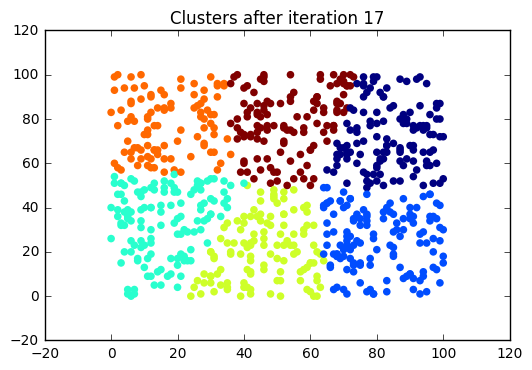

MOVED = 3


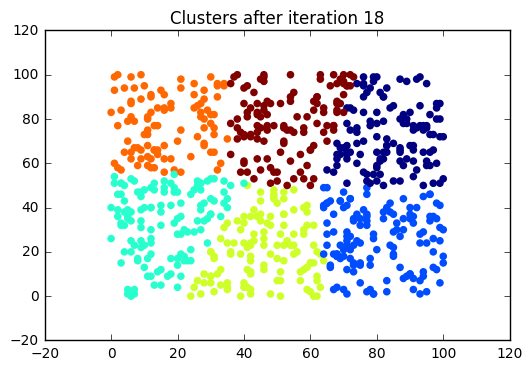

DONE


In [3]:
for iter in range(0, 50):
  # Compute mean for every cluster.
  sumx = [0.0] * K
  sumy = [0.0] * K
  totals = [0] * K
  for i in range(0, N):
    sumx[ cluster[i] ] += points[i][0]
    sumy[ cluster[i] ] += points[i][1]
    totals[ cluster[i] ] += 1

  # Compute new means.
  meanx = [0] * K
  meany = [0] * K
  for i in range(0, K):
    meanx[i] = sumx[i] / totals[i]
    meany[i] = sumy[i] / totals[i]

  # Create new clusters.
  new_cluster = [0] * N
  for i in range(0, N):
    mindist = 1 << 30
    for j in range(0, K):
      dist = (points[i][0] - meanx[j]) ** 2 + (points[i][1] - meany[j]) ** 2
      if dist < mindist:
        mindist = dist
        cluster_idx = j

    new_cluster[i] = cluster_idx

  if cluster == new_cluster:
    print 'DONE'
    break
  else:
    moved = 0
    for i in range(0, N):
      if cluster[i] != new_cluster[i]: moved += 1
    print 'MOVED =', moved

    cluster = new_cluster

  plot_points('Clusters after iteration %d' % (iter+1))      